In [1]:
import tensorflow as tf
import pandas as pd
import xarray as xr
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error,confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier
import keras
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier




# Deep learning model
from tensorflow.keras.layers import Input, Dense, Reshape, Concatenate, Embedding, Dropout, Flatten
from tensorflow.keras.models import Model, load_model, Sequential
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from keras.regularizers import l1, l2
from keras.layers import BatchNormalization
from scikeras.wrappers import KerasClassifier, KerasRegressor
import keras.backend as K


2024-05-08 10:23:24.634236: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 10:23:24.675050: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 10:23:24.675111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 10:23:24.676126: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-08 10:23:24.682132: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 10:23:24.682671: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
parameter_data = pd.read_csv('../02_machine_learning/parameter_data_lead_time_also_FZ.csv')
parameter_data.drop(columns=['airport_id'], inplace=True)
parameter_data['airport_id'] = pd.factorize(parameter_data['airport'])[0]

In [3]:
# For analyzis in dataframe only

parameter_data['time'] = pd.to_datetime(parameter_data['time'])

# Sort the DataFrame by 'timestamp' in ascending order
# Shift the 'metar' column by one hour
parameter_data['metar_lead_1'] = parameter_data['metar'].shift(-1)
parameter_data['metar_lead_2'] = parameter_data['metar'].shift(-2)
parameter_data['metar_lead_2'] = parameter_data['metar'].shift(-3)
parameter_data['metar_lead_2'] = parameter_data['metar'].shift(-4)

In [6]:
parameter_data

,Unnamed: 0,airport,time,contain_FZ,metar,metartype,air_temperature_0m,air_temperature_2m,relative_humidity_2m,precipitation_amount_acc,...,liquid_water_content_of_surface_snow_lead_4,liquid_water_content_of_surface_snow_lead_5,contain_FZ_lead_1,contain_FZ_lead_2,contain_FZ_lead_3,contain_FZ_lead_4,contain_FZ_lead_5,airport_id,metar_lead_1,metar_lead_2
0,0,ENAL,2021-01-01 01:00:00,False,ENAL 010120Z 08005KT 9999 FEW027/// SCT040/// ...,AUTO,5.98,2.12,0.809798,0.000000,...,0.0,0.0,False,False,False,False,False,0,ENAL 010150Z 09006KT 9999 BKN025/// M01/M02 Q1...,ENAL 010520Z 14006KT 9999 OVC031/// 02/M01 Q1006=
1,1,ENAL,2021-01-01 02:00:00,False,ENAL 010150Z 09006KT 9999 BKN025/// M01/M02 Q1...,AUTO,5.84,1.90,0.826657,0.000000,...,0.0,0.0,False,False,False,False,False,0,ENAL 010320Z 09006KT 9999 OVC025/// 01/M02 Q1006=,ENAL 010550Z 14008KT 9999 OVC030/// 02/M02 Q1006=
2,2,ENAL,2021-01-01 03:00:00,False,ENAL 010320Z 09006KT 9999 OVC025/// 01/M02 Q1006=,AUTO,5.79,1.63,0.865065,0.000000,...,0.0,0.0,False,False,False,False,False,0,ENAL 010420Z 17003KT 9999 OVC028/// 01/M01 Q1006=,ENAL 010650Z 14006KT 9999 OVC025/// 02/M01 Q1006=
3,3,ENAL,2021-01-01 04:00:00,False,ENAL 010420Z 17003KT 9999 OVC028/// 01/M01 Q1006=,AUTO,5.81,1.67,0.869259,0.000000,...,0.0,0.0,False,False,False,False,False,0,ENAL 010520Z 14006KT 9999 OVC031/// 02/M01 Q1006=,ENAL 010820Z 14007KT 9999 OVC025/// 02/M01 Q1007=
4,4,ENAL,2021-01-01 05:00:00,False,ENAL 010520Z 14006KT 9999 OVC031/// 02/M01 Q1006=,AUTO,5.99,2.06,0.839891,0.000000,...,0.0,0.0,False,False,False,False,False,0,ENAL 010550Z 14008KT 9999 OVC030/// 02/M02 Q1006=,ENAL 010850Z 14008KT 9999 OVC025/// 02/M02 Q1007=
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555308,555308,ENZV,2023-12-31 19:00:00,False,ENZV 311850Z 09018G29KT CAVOK 05/M04 Q0994=,MANUAL,1.45,2.29,0.667786,0.000810,...,0.0,0.0,False,False,False,False,False,53,ENZV 311950Z 10017KT CAVOK 05/M04 Q0994=,ENZV 312250Z 10021KT CAVOK 05/M04 Q0994=
555309,555309,ENZV,2023-12-31 20:00:00,False,ENZV 311950Z 10017KT CAVOK 05/M04 Q0994=,MANUAL,1.34,2.23,0.669755,0.005201,...,0.0,0.0,False,False,False,False,False,53,ENZV 312050Z 10018KT CAVOK 05/M04 Q0994=,None
555310,555310,ENZV,2023-12-31 21:00:00,False,ENZV 312050Z 10018KT CAVOK 05/M04 Q0994=,MANUAL,1.11,2.02,0.669258,0.015085,...,0.0,0.0,False,False,False,False,False,53,ENZV 312220Z 10023G34KT CAVOK 05/M05 Q0994=,None
555311,555311,ENZV,2023-12-31 22:00:00,False,ENZV 312220Z 10023G34KT CAVOK 05/M05 Q0994=,MANUAL,0.85,1.80,0.660101,0.023475,...,0.0,0.0,False,False,False,False,False,53,ENZV 312250Z 10021KT CAVOK 05/M04 Q0994=,None


In [3]:
# Train test split
X_train, X_test = train_test_split(parameter_data, test_size = 0.2, random_state=9)

### Downsampling the occurrences of FALSE for contain_FZ

In [4]:
downsampling_percentage = 0.033

fz_majority = X_train[X_train['contain_FZ'] == False]
fz_minority = X_train[X_train['contain_FZ'] == True]

print(f'Size of majority: {fz_majority.shape}')
print(f'Size of minority: {fz_minority.shape}')

majority_size = int(len(fz_majority) * downsampling_percentage)

# Downsample the majority class to match the minority class
downsampled_majority = resample(fz_majority, replace=False, n_samples=majority_size, random_state=42)
print(f'Size of downsampled majority: {downsampled_majority.shape}')

# Combine the downsampled majority class with the original minority class
downsampled_X_train = pd.concat([downsampled_majority, fz_minority])

Size of majority: (440007, 127)
Size of minority: (4243, 127)
Size of downsampled majority: (14520, 127)


In [5]:
X_train_downsampled = downsampled_X_train.drop(['contain_FZ'], axis=1)
X_train_fz = downsampled_X_train['contain_FZ']
y_train = downsampled_X_train[['contain_FZ_lead_4']]
y_test = X_test['contain_FZ_lead_4']
X_test_fz = X_test['contain_FZ']
#X_test = X_test.drop(['contain_FZ'], axis=1)

## F1-score 

In [6]:
def f1_score_calc(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

## Standardize features

In [7]:
data_params = ['air_temperature_0m', 'air_temperature_2m', 'relative_humidity_2m', 'x_wind_10m', 'y_wind_10m', 'fog_area_fraction', 'surface_air_pressure', 
               'air_pressure_at_sea_level', 'precipitation_amount_calculated',
              'air_temperature_pl_850', 'x_wind_pl_850', 'y_wind_pl_850', 'air_temperature_pl_925', 'x_wind_pl_925', 'y_wind_pl_925',
              'liquid_water_content_of_surface_snow']


In [8]:
data_params_lead_time = [f'{param}_lead_{lead_time}' for param in data_params for lead_time in range(1,5)]

In [9]:
data_params_lead_time

['air_temperature_0m_lead_1',
 'air_temperature_0m_lead_2',
 'air_temperature_0m_lead_3',
 'air_temperature_0m_lead_4',
 'air_temperature_2m_lead_1',
 'air_temperature_2m_lead_2',
 'air_temperature_2m_lead_3',
 'air_temperature_2m_lead_4',
 'relative_humidity_2m_lead_1',
 'relative_humidity_2m_lead_2',
 'relative_humidity_2m_lead_3',
 'relative_humidity_2m_lead_4',
 'x_wind_10m_lead_1',
 'x_wind_10m_lead_2',
 'x_wind_10m_lead_3',
 'x_wind_10m_lead_4',
 'y_wind_10m_lead_1',
 'y_wind_10m_lead_2',
 'y_wind_10m_lead_3',
 'y_wind_10m_lead_4',
 'fog_area_fraction_lead_1',
 'fog_area_fraction_lead_2',
 'fog_area_fraction_lead_3',
 'fog_area_fraction_lead_4',
 'surface_air_pressure_lead_1',
 'surface_air_pressure_lead_2',
 'surface_air_pressure_lead_3',
 'surface_air_pressure_lead_4',
 'air_pressure_at_sea_level_lead_1',
 'air_pressure_at_sea_level_lead_2',
 'air_pressure_at_sea_level_lead_3',
 'air_pressure_at_sea_level_lead_4',
 'precipitation_amount_calculated_lead_1',
 'precipitation_amoun

In [10]:
all_data_params = data_params + data_params_lead_time

In [11]:
scaler = StandardScaler()

X_train_downsampled[all_data_params] = scaler.fit_transform(X_train_downsampled[all_data_params])
X_test[all_data_params] = scaler.transform(X_test[all_data_params])

## Embedding layer for airport id

In [12]:
#num_airports = len(parameter_data_embed['airport_id'].unique())
num_airports = len(parameter_data['airport_id'].unique())
print(f'Number of airports: {num_airports}')
input_aid = Input(shape=(1,))
output_dim = 20

embedding_layer = Embedding(input_dim=num_airports, output_dim=output_dim, name="embedding_airport")(input_aid)
flatten_airports = Flatten()(embedding_layer)

emb_cat = Reshape(target_shape=(output_dim,))(flatten_airports)

Number of airports: 54


## Model: ANN

In [30]:
l1_lambda = 0.002

param_data_obs_dim = Input(shape=16,)
lead_time_data_dim = Input(shape=64,)
contain_fz_obs_dim = Input(shape=1,)

# Concatenate embedded categorical airport feature with param features
concat = Concatenate()([emb_cat, param_data_obs_dim, contain_fz_obs_dim, lead_time_data_dim])

dense_layer_1 = Dense(units=64, kernel_initializer='he_uniform', kernel_regularizer=l1(l1_lambda), activation='relu')(concat)
batch_norm_1 = BatchNormalization()(dense_layer_1)
#dropout_1 = Dropout(0.2)(batch_norm_1)

dense_layer_2 = Dense(units=64, kernel_initializer='he_uniform', kernel_regularizer=l1(l1_lambda),activation='relu')(batch_norm_1)
batch_norm_2 = BatchNormalization()(dense_layer_2)

dense_layer_3 = Dense(units=64, kernel_initializer='he_uniform', kernel_regularizer=l1(l1_lambda),activation='relu')(batch_norm_2)
batch_norm_3 = BatchNormalization()(dense_layer_3)


#dense_layer_4 = Dense(units=64, kernel_initializer='he_uniform', kernel_regularizer=l1(l1_lambda),activation='relu')(batch_norm_3)
#batch_norm_4 = BatchNormalization()(dense_layer_4)

#dense_layer_4 = Dense(units=32, kernel_initializer='he_uniform', kernel_regularizer=l1(l1_lambda),activation='relu')(dense_layer_3)

#batch_norm_2 = BatchNormalization()(dense_layer_3)

#dense_layer_3 = Dense(units=64, kernel_initializer='he_uniform', kernel_regularizer=l1(l1_lambda), activation='relu')(batch_norm_2)
#batch_norm_3 = BatchNormalization()(dense_layer_3)

#dense_layer_4 = Dense(units=32, kernel_initializer='he_uniform', kernel_regularizer=l1(l1_lambda), activation='relu')(batch_norm_3)
#batch_norm_4 = BatchNormalization()(dense_layer_4)

# Output Layer
output_layer = Dense(units=1, activation='sigmoid')(batch_norm_3)

model = Model(inputs=[input_aid, param_data_obs_dim, contain_fz_obs_dim, lead_time_data_dim], outputs=output_layer)

In [31]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_airport (Embeddi  (None, 1, 20)                1080      ['input_1[0][0]']             
 ng)                                                                                              
                                                                                                  
 flatten (Flatten)           (None, 20)                   0         ['embedding_airport[0][0]']   
                                                                                                  
 reshape (Reshape)           (None, 20)                   0         ['flatten[0][0]']       

In [32]:
# Compile the model
ml_optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=ml_optimizer, metrics=[f1_score_calc])

In [33]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [34]:
history = model.fit([X_train_downsampled['airport_id'], X_train_downsampled[data_params], X_train_fz, X_train_downsampled[data_params_lead_time]], y_train, epochs=100, batch_size=32, shuffle=True, validation_split=0.2, verbose=1, callbacks=early_stopping)

Epoch 1/100


/home/tonjek/.local/lib/python3.9/site-packages/keras/src/engine/data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


470/470 [==============================] - 2s 3ms/step - loss: 2.2899 - f1_score_calc: 0.0084 - val_loss: 1.7851 - val_f1_score_calc: 0.0706
Epoch 2/100
470/470 [==============================] - 1s 2ms/step - loss: 0.5151 - f1_score_calc: 0.0057 - val_loss: 1.1970 - val_f1_score_calc: 0.0860
Epoch 3/100
470/470 [==============================] - 1s 2ms/step - loss: 0.2454 - f1_score_calc: 0.0230 - val_loss: 0.9031 - val_f1_score_calc: 0.2144
Epoch 4/100
470/470 [==============================] - 1s 2ms/step - loss: 0.1694 - f1_score_calc: 0.0142 - val_loss: 0.7797 - val_f1_score_calc: 0.4298
Epoch 5/100
470/470 [==============================] - 1s 2ms/step - loss: 0.1283 - f1_score_calc: 0.0213 - val_loss: 0.9948 - val_f1_score_calc: 0.4565
Epoch 6/100
470/470 [==============================] - 1s 2ms/step - loss: 0.1127 - f1_score_calc: 0.0227 - val_loss: 0.5867 - val_f1_score_calc: 0.4230
Epoch 7/100
470/470 [==============================] - 1s 2ms/step - loss: 0.0908 - f1_score_c

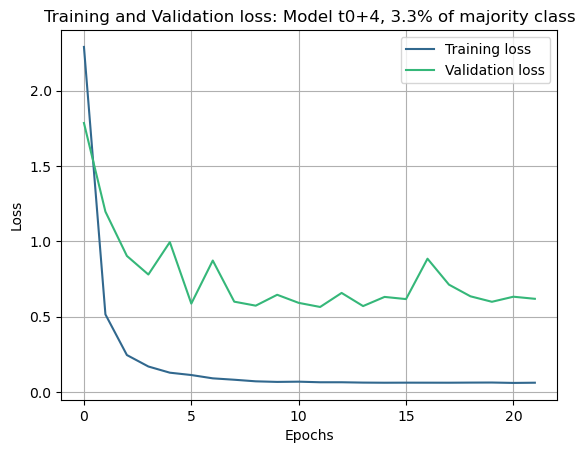

In [35]:
history = pd.DataFrame(history.history)

cmap_loss_val = sns.color_palette('viridis', 2)


plt.plot(history.loc[:, ['loss']], color= cmap_loss_val[0], label='Training loss')
plt.plot(history.loc[:, ['val_loss']], color = cmap_loss_val[1], label='Validation loss')
plt.title('Training and Validation loss: Model t0+4, 3.3% of majority class')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.grid(True)

plt.savefig('training_validation_loss_t0+4_2.png')
plt.show()

## Prediction

In [36]:
# Make predictions
y_pred = model.predict([X_test['airport_id'], X_test[data_params], X_test_fz, X_test[data_params_lead_time]])

3471/3471 [==============================] - 2s 690us/step


In [37]:
y_pred_val = (y_pred > 0.1)
print(classification_report(y_test, y_pred_val))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99    109991
        True       0.20      0.31      0.25      1072

    accuracy                           0.98    111063
   macro avg       0.60      0.65      0.62    111063
weighted avg       0.99      0.98      0.98    111063



In [38]:
conf_matrix = confusion_matrix(y_test, y_pred_val)

In [39]:
conf_matrix

array([[108684,   1307],
       [   738,    334]])

In [40]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_val)

In [41]:
f1

0.24622189458164392

## ROC AUC

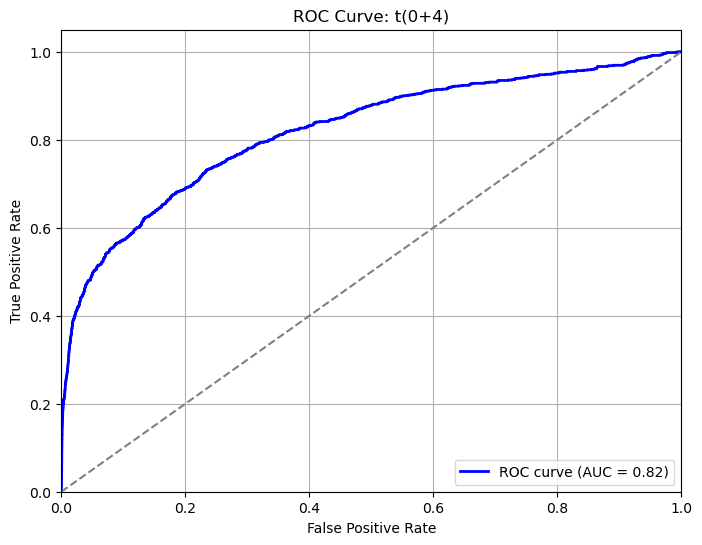

In [42]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: t(0+4)')
plt.legend(loc="lower right")
plt.grid(True)
#plt.savefig('rocauc_lead4_0.8.png')
plt.show()

In [1]:
# Save y_pred as numpy
#np.save('y_pred_t+4_2.npy', y_pred)

# Save corresponding y_test
#np.save('y_test_t+4_2.npy', y_test)

# Analyzation of data
The code from here and forward is for analyzation purposes. 

In [32]:
y_pred = y_pred.flatten()

In [33]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Time': X_test['time'], 'Airport': X_test['airport'], 'Metar': X_test['metar_lead_2'], 'Metartype': X_test['metartype']})

In [34]:
comparison_df.to_csv('comparison.csv', index=False)

In [35]:
pd.set_option('display.max_colwidth', 3000)

In [36]:
comparison_df[comparison_df['Predicted'] > 0.8].head(50)

,Actual,Predicted,Time,Airport,Metar,Metartype
177484,True,0.891937,2022-01-03 09:00:00,ENGM,ENGM 031320Z 00000KT 0700 R19R/2000N R01R/0900D R19L/0750N R01L/1100D -FZRA FZFG BKN002 M00/M01 Q0983 NOSIG=,MANUAL
413141,False,0.827091,2023-11-02 03:00:00,ENRY,ENRY 020720Z 03007KT 8000 -SN FEW003 BKN004 00/M01 Q0995 TEMPO 4000 -SN=,AUTO
45667,False,0.853375,2021-12-12 23:00:00,ENBJ,ENBJ 130250Z 03004KT CAVOK M03/M04 Q1014 =,MANUAL
406832,True,0.819560,2021-12-31 17:00:00,ENRY,ENRY 312050Z VRB02KT 0200NDV R12/P2000N R30/1000 FZFG SCT000/// M06/M06 Q1004=,AUTO
389323,True,0.883245,2022-11-14 20:00:00,ENRO,ENRO 150020Z 34002KT 0800 R31/1300 FZFG OVC001 M05/M06 Q1019=,AUTO
183009,False,0.876956,2023-03-19 21:00:00,ENGM,ENGM 200120Z 23004KT 210V280 0400 R19R/0800U R01R/0500N R19L/0500N R01L/0500N FG VV002 03/03 Q1005=,MANUAL
177047,True,0.969523,2021-12-14 07:00:00,ENGM,ENGM 141120Z 22003KT 120V270 0300 R19R/0400N R01R/0375N R19L/0375N R01L/0400N FZFG VV002 M01/M02 Q1013=,MANUAL
176189,True,0.916703,2021-11-05 03:00:00,ENGM,ENGM 050720Z 16003KT 140V210 0400 R19R/0600N R01R/0325N R19L/0400D R01L/0500D FZFG VV002 M02/M03 Q1005 TEMPO 0800 FZFG=,MANUAL
183002,False,0.815050,2023-03-19 14:00:00,ENGM,ENGM 191820Z 21011KT 0900 R19R/1700U R01R/0800N R19L/1000U R01L/1900N -RA FG VV002 03/03 Q1009 TEMPO 0500 FG=,MANUAL
180899,False,0.917074,2022-12-20 11:00:00,ENGM,ENGM 201450Z VRB02KT 1000 R19R/P2000N R01R/0900N R19L/1400D R01L/0900U FG BKN002 00/M00 Q0999 TEMPO 0500 FG=,MANUAL


In [37]:
only_true_fz = comparison_df[comparison_df['Actual'] == True]

In [38]:
only_false_fz = comparison_df[comparison_df['Actual'] == False]

In [39]:
only_true_fz.tail(50)

,Actual,Predicted,Time,Airport,Metar,Metartype
399004,True,0.057055,2022-12-24 02:00:00,ENRS,ENRS 240620Z 28020KT 1300 R02/P2000 -SN VV013 M01/M02 Q0997 REFZRA=,AUTO
326590,True,0.064637,2022-12-11 19:00:00,ENNM,ENNM 112250Z 05005KT 9999 -FZRA NCD M15/M17 Q1022=,MANUAL
515078,True,0.068720,2022-03-30 06:00:00,ENUG,ENUG 300950Z 03031KT 9999NDV SCT033/// BKN058/// 00/M06 Q1006 REFZRA W///S5=,AUTO
250874,True,0.449308,2021-11-26 04:00:00,ENKR,ENKR 260820Z 00000KT 0050 R05/0375N R23/0250N FZFG VV000 M21/M24 Q0999 RMK WIND 731FT 11005KT=,MANUAL
330872,True,0.388056,2023-11-19 18:00:00,ENNM,ENNM 192150Z 06012KT 9999 NCD M09/M11 Q1010 REFZRA=,MANUAL
335058,True,0.035026,2023-02-07 17:00:00,ENNO,ENNO 080820Z 00000KT 1000 FZFG VV002 M05/M06 Q1032=,MANUAL
544865,True,0.011479,2023-12-09 23:00:00,ENVD,ENVD 100250Z 20017KT 180V230 9999 -FZRA FEW007/// SCT011/// OVC018/// M12/M14 Q1020 RESG=,AUTO
330897,True,0.503183,2023-11-20 19:00:00,ENNM,ENNM 202320Z 05006KT 9999 NCD M10/M11 Q1023 REFZRA=,AUTO
234639,True,0.002227,2023-04-06 06:00:00,ENJA,ENJA 070550Z 35011KT FZDZ OVC007 M03/M04 Q1011=,MANUAL
305429,True,0.009230,2021-01-04 09:00:00,ENNA,ENNA 041320Z 18013KT 9999 -FZDZ BKN035 BKN049 M02/M05 Q1027 RMK WIND 1800FT 25014KT=,MANUAL


<AxesSubplot: >

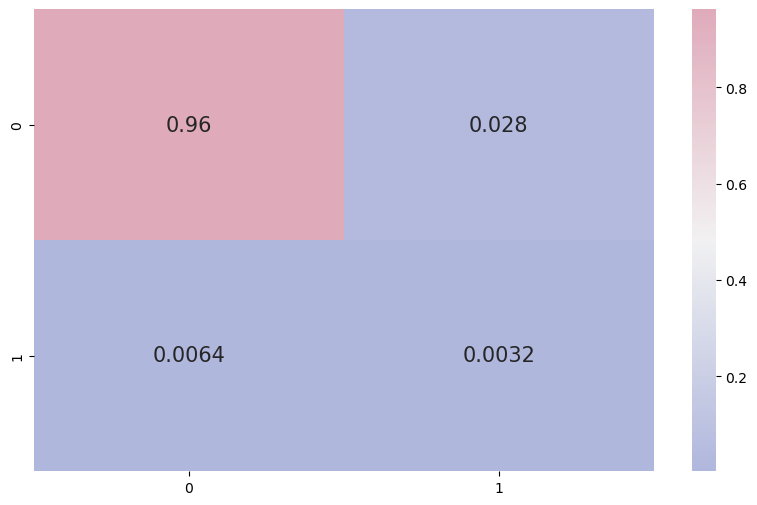

In [40]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(10,6))
cf_matrix = confusion_matrix(y_test, y_pred_val)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

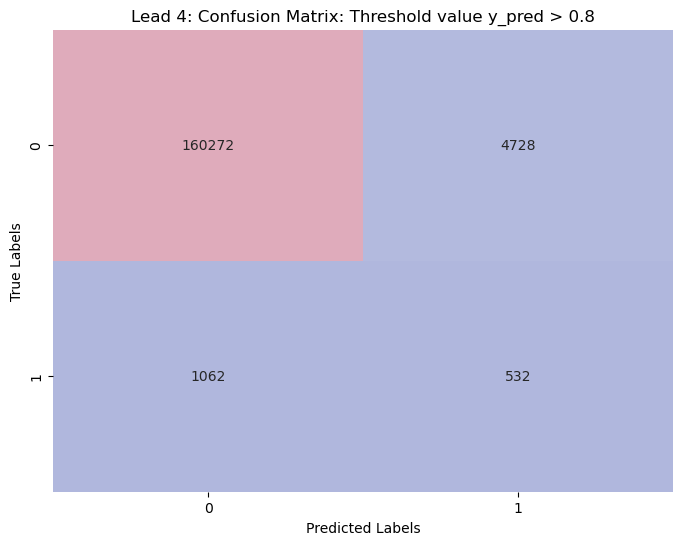

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred_val)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap1, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Lead 4: Confusion Matrix: Threshold value y_pred > 0.8')
plt.savefig('cmap_lead4_0.8.png')
plt.show()

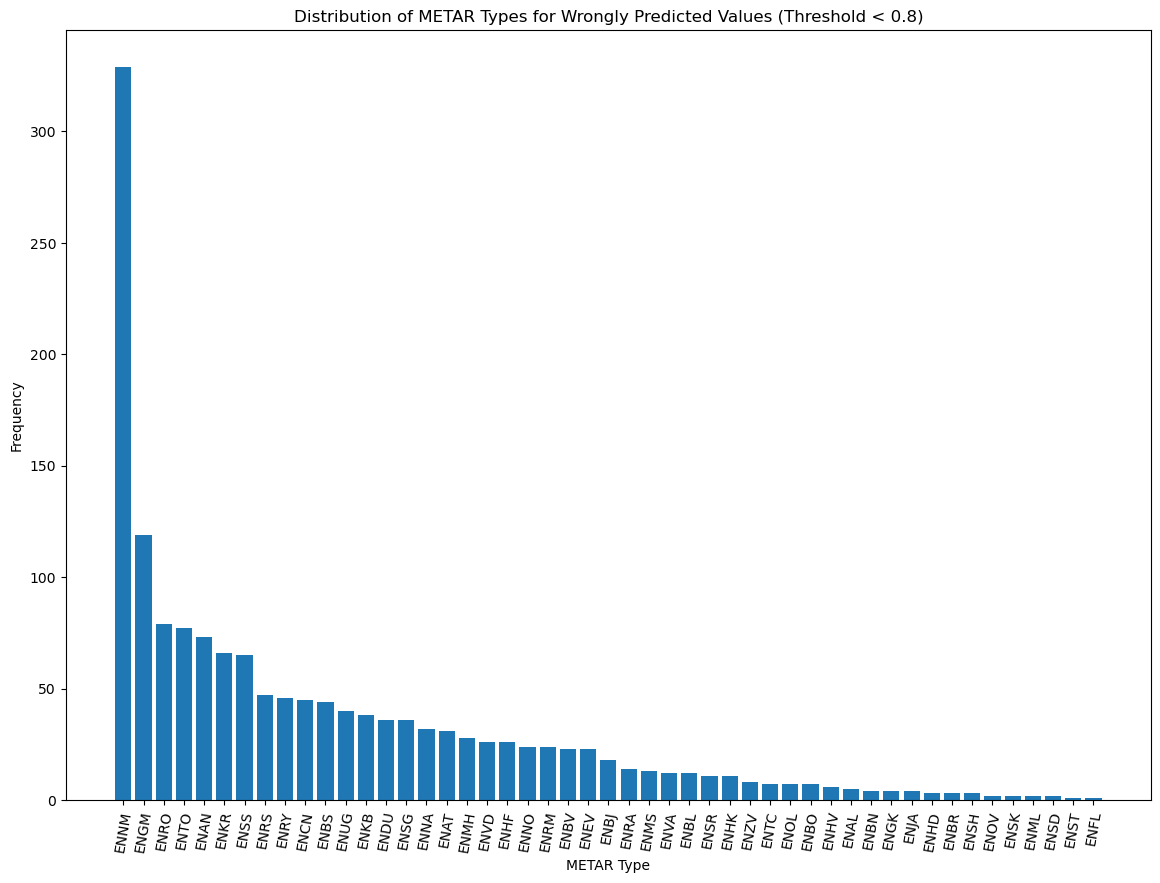

In [42]:
wrongly_predicted_df = only_true_fz[(only_true_fz['Predicted'] < 0.8)]

metar_type_counts = wrongly_predicted_df['Airport'].value_counts()

plt.figure(figsize=(14, 10))
plt.bar(metar_type_counts.index, metar_type_counts.values)
plt.xlabel('METAR Type')
plt.ylabel('Frequency')
plt.title('Distribution of METAR Types for Wrongly Predicted Values (Threshold < 0.8)')
plt.xticks(rotation=80)
plt.show()

<Figure size 1400x1000 with 0 Axes>

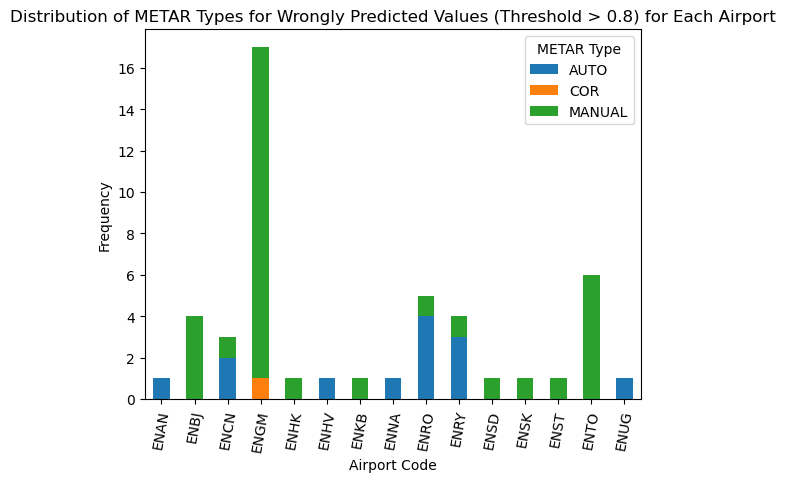

In [43]:
wrongly_predicted_false_df = comparison_df[(comparison_df['Actual'] == False) & (comparison_df['Predicted'] >= 0.8)]


metar_type_counts_per_airport = wrongly_predicted_false_df.groupby(['Airport', 'Metartype']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 10))  
metar_type_counts_per_airport.plot(kind='bar', stacked=True)
plt.xlabel('Airport Code')
plt.ylabel('Frequency')
plt.title('Distribution of METAR Types for Wrongly Predicted Values (Threshold > 0.8) for Each Airport')
plt.xticks(rotation=80)
plt.legend(title='METAR Type')
plt.show()

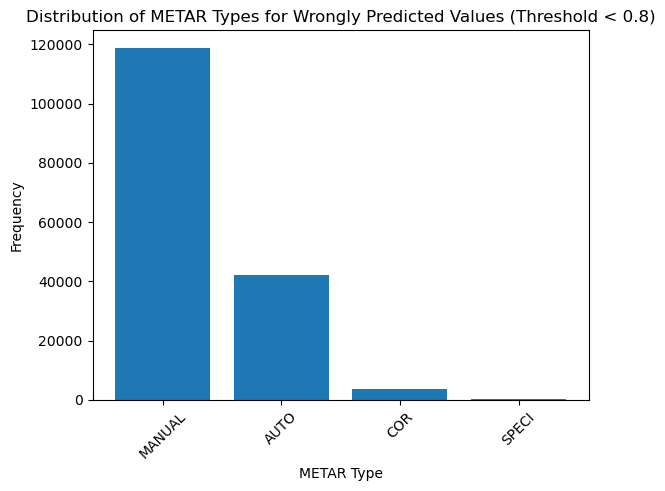

In [44]:
wrongly_predicted_df = only_false_fz[(only_false_fz['Predicted'] < 0.8)]

metar_type_counts = wrongly_predicted_df['Metartype'].value_counts()

plt.bar(metar_type_counts.index, metar_type_counts.values)
plt.xlabel('METAR Type')
plt.ylabel('Frequency')
plt.title('Distribution of METAR Types for Wrongly Predicted Values (Threshold < 0.8)')
plt.xticks(rotation=45)
plt.show()

In [45]:
only_false_fz.head(50)

,Actual,Predicted,Time,Airport,Metar,Metartype
320059,False,0.003620,2023-10-19 17:00:00,ENNA,ENNA 192120Z 16008KT 9999 SCT038 BKN160 M02/M06 Q1024 RMK WIND 1800FT 27021KT=,MANUAL
514985,False,0.199189,2022-03-26 09:00:00,ENUG,ENUG 261320Z 35024KT 9999NDV FEW033/// BKN049/// M04/M13 Q1021 W///S4=,AUTO
445872,False,0.000399,2022-12-03 06:00:00,ENSK,ENSK 031020Z 15012KT 9999 FEW023 02/M03 Q1036=,AUTO
490498,False,0.000035,2022-04-20 17:00:00,ENTC,ENTC 202050Z VRB01KT 9999 SCT057 05/02 Q1026 NOSIG RMK WIND 2600FT 23009KT=,MANUAL
183690,False,0.015560,2023-04-26 23:00:00,ENGM,ENGM 270320Z 32003KT 290V360 CAVOK 01/M04 Q1005=,MANUAL
138911,False,0.004446,2021-11-20 16:00:00,ENDU,ENDU 201950Z 26004KT 9999 SCT019/// OVC026/// M02/M04 Q0999 RMK WIND 1100FT 31012KT WIND 2200FT 34012KT=,AUTO
166857,False,0.004900,2021-03-03 20:00:00,ENFL,ENFL 032350Z 34012KT 8000NDV -SN FEW011/// SCT017/// BKN026/// 00/M02 Q1027=,MANUAL
404365,False,0.001546,2021-02-16 10:00:00,ENRY,ENRY 161420Z 09004KT 8000 OVC008 M01/M02 Q1016 NOSIG=,MANUAL
395799,False,0.000187,2023-12-30 10:00:00,ENRO,ENRO 301350Z 11005KT 9999 BKN061/// OVC127/// M07/M09 Q1000=,AUTO
296467,False,0.005670,2021-12-19 15:00:00,ENMS,ENMS 191920Z VRB03KT 9999 FEW024 SCT045 02/00 Q1021 RMK WIND 412FT 29003KT=,MANUAL


### Look at characteristics for wrongly predicted True and False

Check the occurrence of SN and RA for predictions over threshold where contain_FZ = FALSE

In [46]:
wrongly_predicted_true = comparison_df[(comparison_df['Actual'] == False) & (comparison_df['Predicted'] >= 0.8)]

filtered_wrongly_predicted_true = wrongly_predicted_true[wrongly_predicted_true['Metar'].str.contains(r'\bRA|\bSN')]


In [47]:
filtered_wrongly_predicted_true

NameError: name 'filtered_wrongly_predicted_df' is not defined

Look at characteristics for wrongly predicted false

In [ ]:
wrongly_predicted_false = comparison_df[(comparison_df['Actual'] == True) & (comparison_df['Predicted'] <= 0.4)]

filtered_wrongly_predicted_false = wrongly_predicted_false[wrongly_predicted_false['Metar'].str.contains(r'\bRA|\bSN')]


In [ ]:
filtered_wrongly_predicted_false.head(50)